In [1]:
from numpy import *
from sympy import *
init_printing()

In [2]:
# state
x, y, z, vx, vy, vz = symbols('x y z v_x v_y v_z')
r                      = Matrix([x, y, z])
v                      = Matrix([vx, vy, vz])
s                      = Matrix([r, v])

In [3]:
# costate
lx, ly, lz, lvx, lvy, lvz = symbols(
    '\\lambda_x \\lambda_y \\lambda_z \\lambda_{v_x} \\lambda_{v_y} \\lambda_{v_z}')
lr                            = Matrix([lx, ly, lz])
lv                            = Matrix([lvx, lvy, lvz])
l                             = Matrix([lr, lv])

In [4]:
# fullstate
fs = Matrix([s, l])

In [5]:
# control: throttle and direction
u, ux, uy, uz = symbols("u, u_x, u_y u_z")
i = Matrix([ux, uy, uz])

In [6]:
# physical parametres
mass, gravity, density, CD, radius, thrust = symbols("m g \\rho C_D r T_{max}")

# optimisation parametres
alpha = symbols("\\alpha")

In [7]:
# gravity
g = Matrix([0, 0, -gravity])

# planaform area
A = pi*radius**2

# volumetric displacement
V = Rational(4,3)*pi*radius**3

# velocity magnitude
vmag = sqrt(v[0]**2 + v[1]**2 + v[2]**2)

# velocity direction
vhat = v/vmag

# gravity
ag = mass*g

# fluid drag
ad = - Rational(1,2)*density*vmag**2*vhat*CD*A

# buoyancy
ab = -density*V*g

# thrust
at = thrust*u*i/mass

In [8]:
# rate of change of position
dr = v

# rate of change of velocity
dv = ag + ad + ab + at

# state equations of motion
ds = Matrix([dr, dv])

In [9]:
# Lagrangian
L = alpha*u + (1 - alpha)*u**2

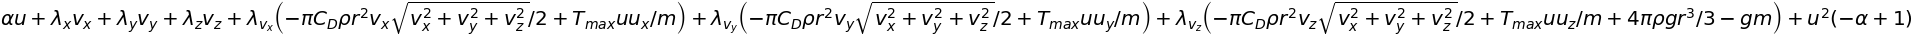

In [10]:
# Hamiltonian
H = l.dot(ds) + L
H

In [11]:
# costate equations of motion
dl = Matrix([H.diff(dim) for dim in s])

In [12]:
# full state equations of motion
dfs = Matrix([ds, dl])

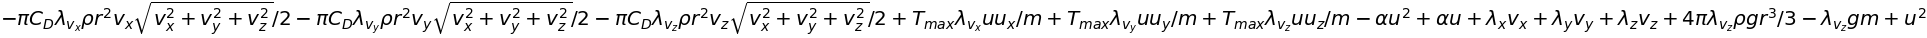

In [13]:
expand(H)

In [14]:
# Hamiltonian terms dependant on thrust direction
Hi = thrust*u/mass * lv.dot(i)
Hi

In [15]:
# optimal thrust direction minimising Hamiltonian terms dependant on thrust direction
lvmag = sqrt(lvx**2 + lvy**2 + lvz**2)
i = -lv/lvmag
i

⎡                   -\lambda_{v_x}                    ⎤
⎢─────────────────────────────────────────────────────⎥
⎢   __________________________________________________⎥
⎢  ╱              2                2                2 ⎥
⎢╲╱  \lambda_{v_x}  + \lambda_{v_y}  + \lambda_{v_z}  ⎥
⎢                                                     ⎥
⎢                   -\lambda_{v_y}                    ⎥
⎢─────────────────────────────────────────────────────⎥
⎢   __________________________________________________⎥
⎢  ╱              2                2                2 ⎥
⎢╲╱  \lambda_{v_x}  + \lambda_{v_y}  + \lambda_{v_z}  ⎥
⎢                                                     ⎥
⎢                   -\lambda_{v_z}                    ⎥
⎢─────────────────────────────────────────────────────⎥
⎢   __________________________________________________⎥
⎢  ╱              2                2                2 ⎥
⎣╲╱  \lambda_{v_x}  + \lambda_{v_y}  + \lambda_{v_z}  ⎦

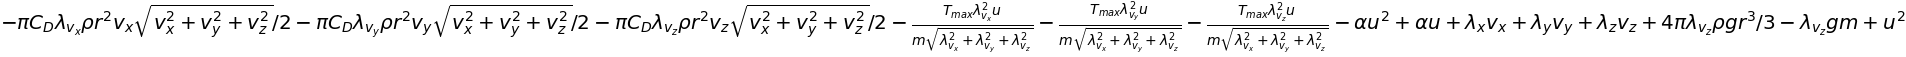

In [16]:
# substitute optimal thrust
at = thrust*u*i/mass
dv = ag + ad + ab + at
ds = Matrix([dr, dv])
H = l.dot(ds) + L
dl = Matrix([H.diff(dim) for dim in s])
dfs = Matrix([ds, dl])

expand(H)

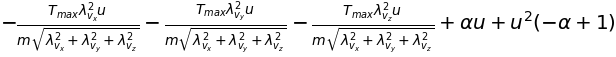

In [17]:
# Hamiltonian terms dependant on thrust magnitude
Hu = (-thrust/mass/lvmag*u*lv).dot(lv) + L
Hu

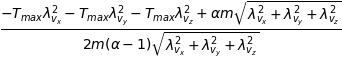

In [18]:
ustar = solve(Hu.diff(u), u)[0]
simplify(ustar)

In [19]:
dfs = dfs.subs(u, symbols("u^*"))
dfs

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                         ___________________ 
⎢                                                 2      ╱   2      2      2  
⎢                                     π⋅C_D⋅\rho⋅r ⋅vₓ⋅╲╱  vₓ  + v_y  + v_z   
⎢                                   - ─────────────────────────────────────── 
⎢                                                        2                    
⎢                                                                             
⎢                                                   

In [29]:
simplify(at)

⎡               -T_{max}⋅\lambda_{v_x}⋅u                ⎤
⎢───────────────────────────────────────────────────────⎥
⎢     __________________________________________________⎥
⎢    ╱              2                2                2 ⎥
⎢m⋅╲╱  \lambda_{v_x}  + \lambda_{v_y}  + \lambda_{v_z}  ⎥
⎢                                                       ⎥
⎢               -T_{max}⋅\lambda_{v_y}⋅u                ⎥
⎢───────────────────────────────────────────────────────⎥
⎢     __________________________________________________⎥
⎢    ╱              2                2                2 ⎥
⎢m⋅╲╱  \lambda_{v_x}  + \lambda_{v_y}  + \lambda_{v_z}  ⎥
⎢                                                       ⎥
⎢               -T_{max}⋅\lambda_{v_z}⋅u                ⎥
⎢───────────────────────────────────────────────────────⎥
⎢     __________________________________________________⎥
⎢    ╱              2                2                2 ⎥
⎣m⋅╲╱  \lambda_{v_x}  + \lambda_{v_y}  + \lambda_{v_z}  ⎦

In [20]:
# save
f = open("auv.tex", "w")
f.write(latex(ds))
f.close()